# **Dicoding Submission Intermediate Machine Learning Developer Time Series**

---


Name: Bethelsando Gemilang Wahyudi

---


Dataset: [https://www.kaggle.com/datasets/uciml/pm25-data-for-five-chinese-cities/data](https://www.kaggle.com/datasets/uciml/pm25-data-for-five-chinese-cities/data)

---



1. Dataset: 52584 sample (Shangai PM 2.5)
2. MAE Training: < 10%
3. MAE Validation: < 10%
4. Callback: Earlystopping & MAE_Callback (MAE and ValMAE)
5. Plot MAE Training & Validation
6. Plot Huber Loss Training & Validation



## **Import Library**

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

## **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bethelsandogw","key":"048f3afb905739bfe6c6ec52fc95fc8a"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jan 28 15:02 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!kaggle datasets list

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science                76KB  2023-12-25 20:03:32          10833        209  1.0              
nelgiriyewithana/apple-quality                              Apple Quality                                   170KB  2024-01-11 14:31:07           4205        103  1.0              
joebeachcapital/57651-spotify-songs                         57,650 Spotify Songs                             21MB  2024-01-23 06:48:36           1010         33  1.0              
sahilwagh/gold-stock-prices                                 Gold Stock Prices                       

In [10]:
!kaggle datasets download -d uciml/pm25-data-for-five-chinese-cities

  0% 0.00/3.64M [00:00<?, ?B/s]
100% 3.64M/3.64M [00:00<00:00, 144MB/s]


In [11]:
!unzip pm25-data-for-five-chinese-cities.zip

Archive:  pm25-data-for-five-chinese-cities.zip
  inflating: BeijingPM20100101_20151231.csv  
  inflating: ChengduPM20100101_20151231.csv  
  inflating: GuangzhouPM20100101_20151231.csv  
  inflating: ShanghaiPM20100101_20151231.csv  
  inflating: ShenyangPM20100101_20151231.csv  


## **Read Data**

In [16]:
df = pd.read_csv('ShanghaiPM20100101_20151231.csv')
df

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
52580,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
52581,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0
52582,52583,2015,12,31,22,4,83.0,86.0,92.0,0.0,70.06,1035.0,5.0,NE,25.0,0.0,0.0


In [17]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.drop(['year', 'month', 'day', 'hour'], axis=1)
df

,No,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,datetime
0,1,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,2010-01-01 00:00:00
1,2,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,2010-01-01 01:00:00
2,3,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0,2010-01-01 02:00:00
3,4,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0,2010-01-01 03:00:00
4,5,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0,2015-12-31 19:00:00
52580,52581,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0,2015-12-31 20:00:00
52581,52582,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0,2015-12-31 21:00:00
52582,52583,4,83.0,86.0,92.0,0.0,70.06,1035.0,5.0,NE,25.0,0.0,0.0,2015-12-31 22:00:00


## **Feature Selection Data**

In [36]:
main_df = df.drop(columns=['season', 'PM_Jingan', 'PM_US Post', 'PM_Xuhui', 'DEWP', 'HUMI', 'PRES', 'cbwd', 'Iws', 'precipitation', 'Iprec'])
main_df

,No,TEMP,datetime
0,1,1.0,2010-01-01 00:00:00
1,2,1.0,2010-01-01 01:00:00
2,3,0.0,2010-01-01 02:00:00
3,4,0.0,2010-01-01 03:00:00
4,5,0.0,2010-01-01 04:00:00
...,...,...,...
52579,52580,5.0,2015-12-31 19:00:00
52580,52581,6.0,2015-12-31 20:00:00
52581,52582,6.0,2015-12-31 21:00:00
52582,52583,5.0,2015-12-31 22:00:00


## **Analyze Time Series Data**

In [37]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        52584 non-null  int64         
 1   TEMP      52584 non-null  float64       
 2   datetime  52584 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [38]:
main_df.isna().sum()

No          0
TEMP        0
datetime    0
dtype: int64

## **Visualize Time Series Data**

In [49]:
def visualize_time_series(date_time, temperature):
    plt.figure(figsize=(16,10))
    plt.plot(date_time, temperature)
    plt.xlabel('DateTime')
    plt.ylabel('Temperature')
    plt.title('Time Series Temperature Average', fontsize=20)
    plt.grid(True)
    plt.show()

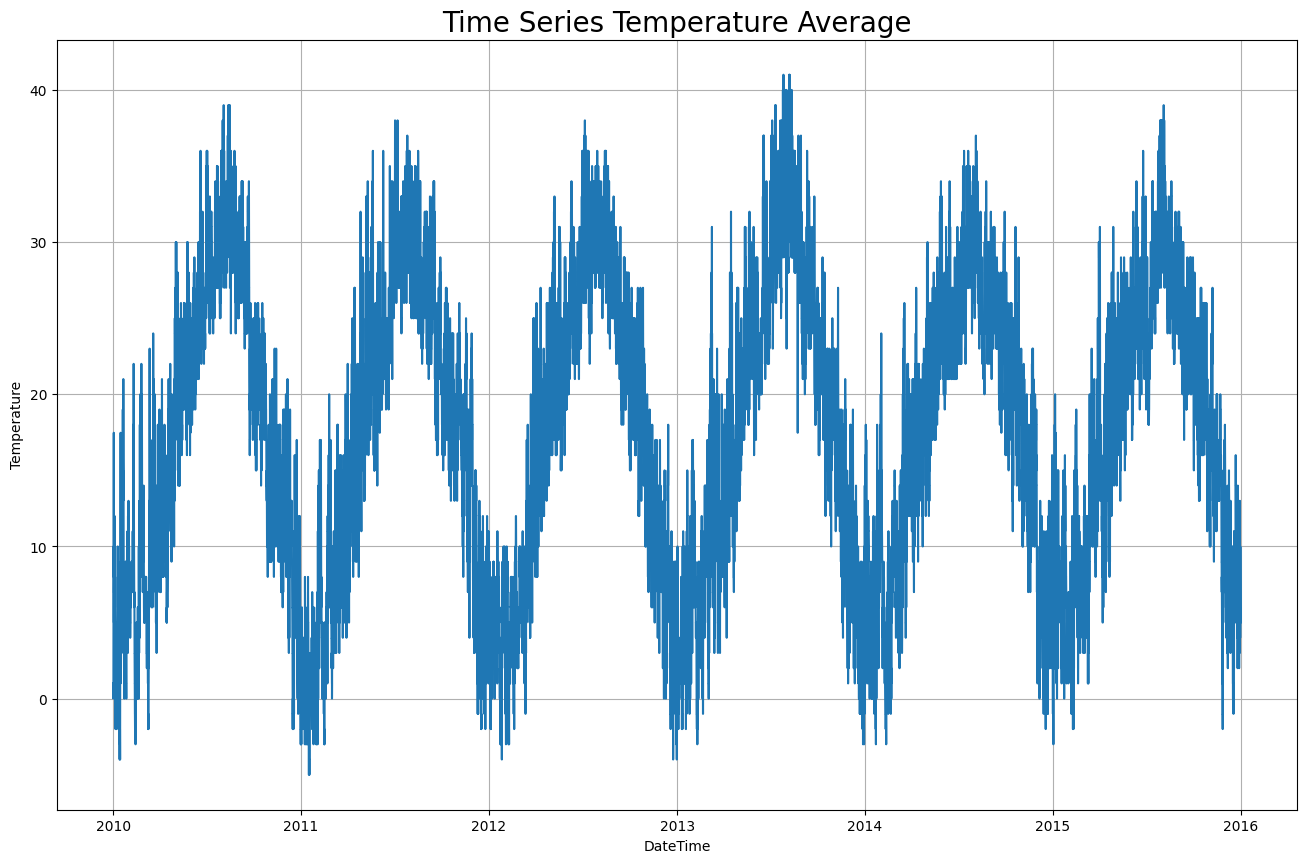

In [50]:
visualize_time_series(main_df['datetime'], main_df['TEMP'])

## **Data Preprocessing**

### **Spliting Dataset**

In [121]:
# get size for split train and val
train_percentage = 0.8
train_size = int(len(main_df) * train_percentage)

# split data into train and val
train_data = main_df[:train_size]
test_data = main_df[train_size:]

In [122]:
train_data

,No,TEMP,datetime
0,1,1.0,2010-01-01 00:00:00
1,2,1.0,2010-01-01 01:00:00
2,3,0.0,2010-01-01 02:00:00
3,4,0.0,2010-01-01 03:00:00
4,5,0.0,2010-01-01 04:00:00
...,...,...,...
42062,42063,26.0,2014-10-19 14:00:00
42063,42064,26.0,2014-10-19 15:00:00
42064,42065,25.0,2014-10-19 16:00:00
42065,42066,25.0,2014-10-19 17:00:00


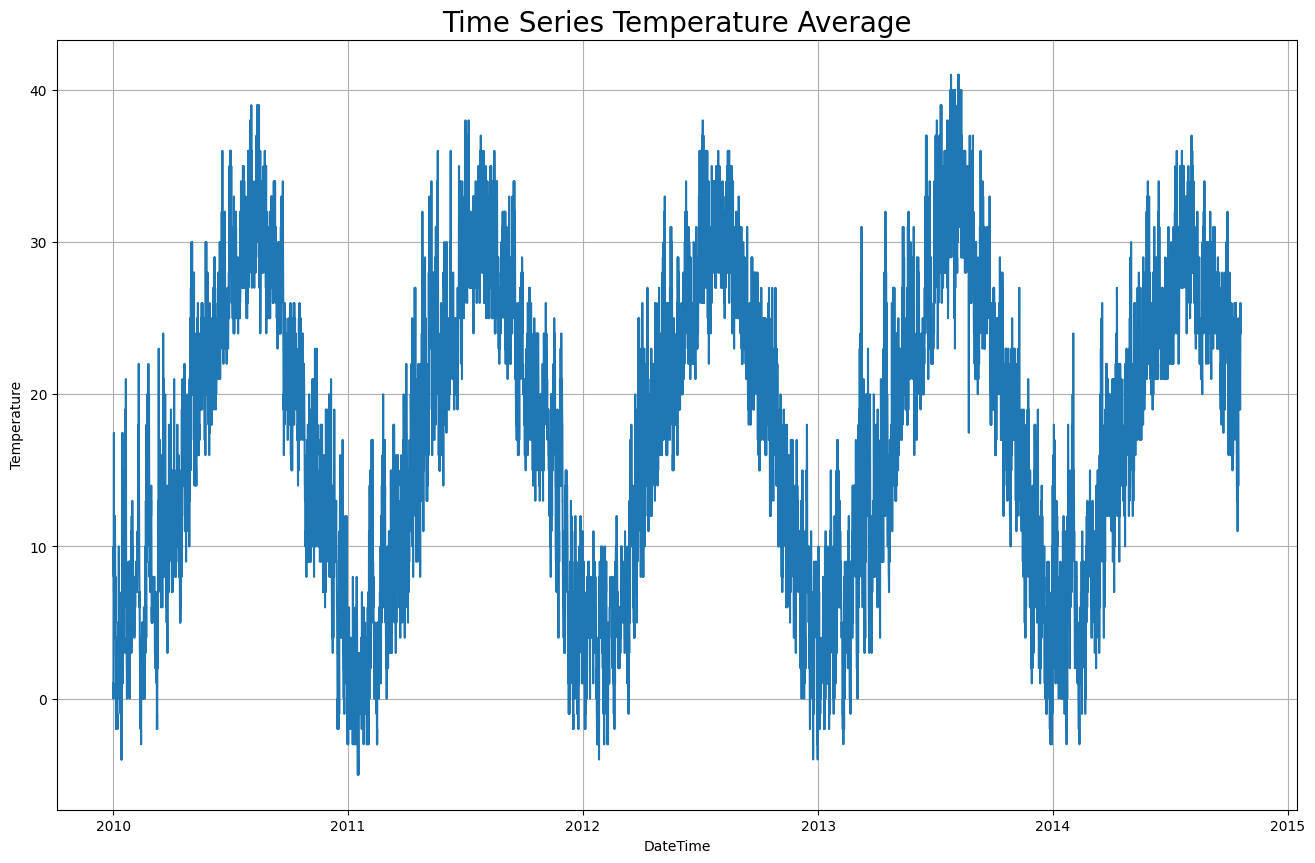

In [123]:
visualize_time_series(train_data['datetime'], train_data['TEMP'])

In [124]:
test_data

,No,TEMP,datetime
42067,42068,23.0,2014-10-19 19:00:00
42068,42069,23.0,2014-10-19 20:00:00
42069,42070,22.0,2014-10-19 21:00:00
42070,42071,22.0,2014-10-19 22:00:00
42071,42072,22.0,2014-10-19 23:00:00
...,...,...,...
52579,52580,5.0,2015-12-31 19:00:00
52580,52581,6.0,2015-12-31 20:00:00
52581,52582,6.0,2015-12-31 21:00:00
52582,52583,5.0,2015-12-31 22:00:00


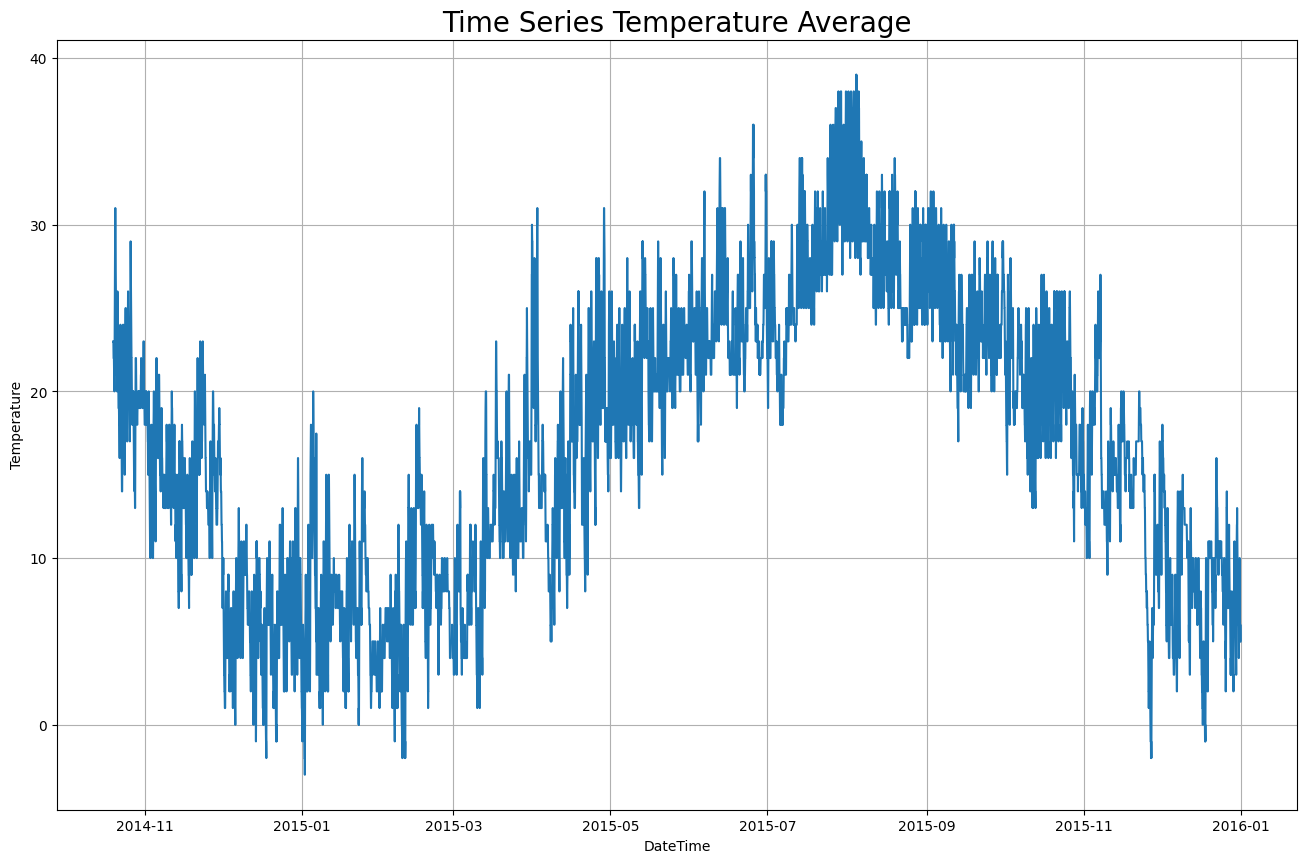

In [125]:
visualize_time_series(test_data['datetime'], test_data['TEMP'])

In [126]:
X_train = train_data['TEMP'].values
X_test = test_data['TEMP'].values

print("Sample x_train", X_train[:10])
print("Sample x_test", X_test[:10])

Sample x_train [1. 1. 0. 0. 0. 0. 1. 1. 2. 4.]
Sample x_test [23. 23. 22. 22. 22. 22. 22. 21. 21. 21.]


### **MinMax Scaling**

In [127]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(np.array(X_train).reshape(-1, 1))

MinMaxScaler()

In [128]:
X_train_with_minmaxscaler = min_max_scaler.transform(np.array(X_train).reshape(-1, 1))
X_test_with_minmaxscaler = min_max_scaler.transform(np.array(X_test).reshape(-1, 1))

print(X_train_with_minmaxscaler)

[[0.13043478]
 [0.13043478]
 [0.10869565]
 ...
 [0.65217391]
 [0.65217391]
 [0.63043478]]


### **Windowing Dataset**

In [129]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [130]:
window_size = 183
train_set = windowed_dataset(
    X_train_with_minmaxscaler.squeeze(),
    window_size=window_size,
    batch_size=64,
    shuffle_buffer=1000
)

val_set = windowed_dataset(
    X_test_with_minmaxscaler.squeeze(),
    window_size=window_size,
    batch_size=64,
    shuffle_buffer=1000
)

## **Modelling**

### **Model Architecture**

In [131]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

### **Compile Model**

In [132]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizer,
    metrics=["mae"]
)

### **Callback**

In [133]:
threshold_mae = (np.max(X_train_with_minmaxscaler) - np.min(X_train_with_minmaxscaler)) * 10 / 100
print("Treshold MAE:", threshold_mae)

Treshold MAE: 0.1


In [137]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('mae') < threshold_mae and logs.get('val_mae') < threshold_mae:
      print(f"MAE and Val MAE less than 10% data scaled ({threshold_mae})")
      self.model.stop_training = True

callback_mae = myCallback()

In [138]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=5)

In [139]:
num_epochs = 30
history = model.fit(
    train_set,
    epochs=num_epochs,
    validation_data=val_set,
    verbose=2,
    batch_size=64,
    callbacks=[callback_mae, early_stopping]
    )

Epoch 1/30
655/655 - 183s - loss: 0.0409 - mae: 0.2330 - val_loss: 0.0125 - val_mae: 0.1344 - 183s/epoch - 279ms/step
Epoch 2/30
655/655 - 175s - loss: 0.0187 - mae: 0.1601 - val_loss: 0.0118 - val_mae: 0.1299 - 175s/epoch - 268ms/step
Epoch 3/30
655/655 - 172s - loss: 0.0170 - mae: 0.1530 - val_loss: 0.0110 - val_mae: 0.1251 - 172s/epoch - 263ms/step
Epoch 4/30
655/655 - 180s - loss: 0.0154 - mae: 0.1454 - val_loss: 0.0102 - val_mae: 0.1201 - 180s/epoch - 274ms/step
Epoch 5/30
655/655 - 178s - loss: 0.0139 - mae: 0.1389 - val_loss: 0.0094 - val_mae: 0.1150 - 178s/epoch - 272ms/step
Epoch 6/30
655/655 - 178s - loss: 0.0127 - mae: 0.1323 - val_loss: 0.0086 - val_mae: 0.1097 - 178s/epoch - 271ms/step
Epoch 7/30
655/655 - 172s - loss: 0.0116 - mae: 0.1259 - val_loss: 0.0078 - val_mae: 0.1043 - 172s/epoch - 262ms/step
Epoch 8/30
655/655 - 175s - loss: 0.0106 - mae: 0.1201 - val_loss: 0.0070 - val_mae: 0.0986 - 175s/epoch - 267ms/step
Epoch 9/30
655/655 - 178s - loss: 0.0096 - mae: 0.1136 -

### **Visualize MAE & Loss**

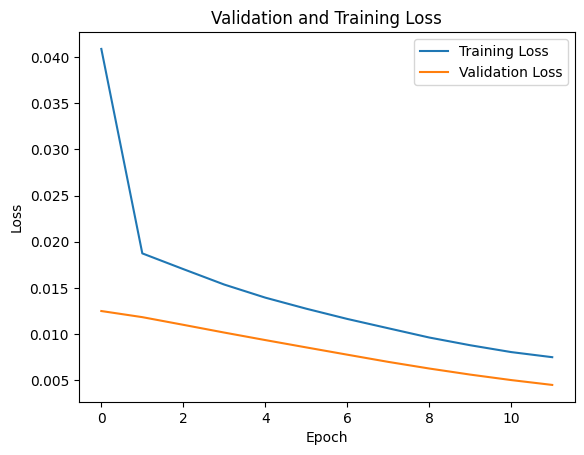

In [140]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation and Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

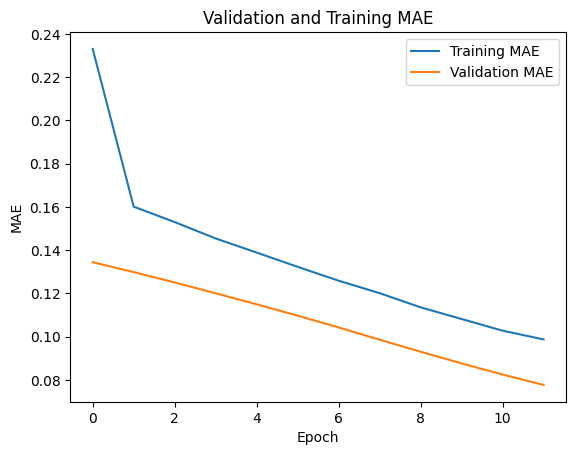

In [141]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Validation and Training MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()